<a href="https://colab.research.google.com/github/Emanuel-Acosta/AnalisisTiendas/blob/main/AnalisisTiendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



En esta sección, se cargan los datos de ventas de las 4 tiendas de Alura Store desde archivos CSV almacenados en un repositorio de GitHub. Utilizamos la librería pandas para leer y cargar los datos de cada tienda en un DataFrame, lo que nos permitirá analizarlos y visualizarlos de manera eficiente.

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()



,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


Los datos corresponden a ventas de productos en distintas categorías como electrónicos, muebles, juguetes y electrodomésticos. Cada entrada incluye información sobre el producto, categoría, precio, costo de envío, fecha de compra, vendedor, lugar de compra, calificación del producto, método de pago y las coordenadas geográficas del lugar de compra. Las calificaciones varían entre 1 y 5, lo que indica la satisfacción del cliente con los productos adquiridos.

# Análisis de Desempeño de las Tiendas de Alura Store

**Objetivo del Proyecto:**
El objetivo de este análisis es ayudar al Sr. Juan a decidir cuál tienda de su cadena Alura Store debería vender para iniciar un nuevo emprendimiento. Para ello, se evaluarán datos clave de las 4 tiendas, como ingresos, categorías más vendidas, reseñas de clientes, productos más vendidos y el envío promedio.

**Metodología:**
- **Análisis de datos de ventas:** Se evaluarán los ingresos y las categorías de productos más populares en cada tienda, lo que nos permitirá identificar el rendimiento de cada una.
- **Evaluación de reseñas de clientes:** Se analizarán las valoraciones de los clientes para entender la satisfacción general con cada tienda.
- **Evaluacion de productos mas y menos vendidos por tienda:** Analizaremos que productos son los mas comprados y cuales no por cada una de las 4 tiendas.
- **Evaluación del envío promedio:** Analizaremos el tiempo promedio de envío de los productos para verificar la eficiencia operativa de cada tienda.

**Visualización de Datos:**
Para facilitar la interpretación de los resultados, se crearán **tres gráficos distintos**, que podrían incluir:
1. Gráficos de barras para comparar ingresos por tienda.
2. Gráficos circulares para mostrar la distribución de los productos mas y menos vendidos.
3. Gráficos de dispersión para analizar la relación entre los ingresos y la satisfacción de los clientes.

#1. Análisis de facturación



Para iniciar el análisis y comparar la facturación entre las cuatro tiendas, es fundamental verificar si los rangos de fechas de venta son lo más similares posible. Esto nos permitirá asegurar que la comparación se base en periodos equivalentes y, por tanto, sea válida y representativa.

### 1.1 Calculo del periodo de ventas por cada tienda:

In [2]:
# Asegurarse de que la columna 'Fecha de Compra' esté en formato de fecha con dayfirst=True
for tienda in [tienda1, tienda2, tienda3, tienda4]:
    tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'], dayfirst=True)

# Función para obtener las fechas mínima y máxima de cada tienda
def obtener_fechas(tienda):
    return tienda['Fecha de Compra'].min(), tienda['Fecha de Compra'].max()

# Lista de tiendas
tiendas = [tienda1, tienda2, tienda3, tienda4]

# Crear el diccionario
fechas_tiendas = {
    f'Tienda {i+1}': obtener_fechas(tienda)
    for i, tienda in enumerate(tiendas)
}

# Función para convertir en años, meses (aproximados) y días
def formatear_diferencia(fecha_inicio, fecha_fin):
    diferencia = fecha_fin - fecha_inicio
    dias = diferencia.days
    años = dias // 365
    dias_restantes = dias % 365
    meses = dias_restantes // 30
    dias_finales = dias_restantes % 30
    return f"{años} años, {meses} meses y {dias_finales} días"

# Mostrar los resultados
for tienda, (inicio, fin) in fechas_tiendas.items():
    tiempo_total = formatear_diferencia(inicio, fin)
    print(f"{tienda}:")
    print(f"  - Fecha de inicio de ventas: {inicio.date()}")
    print(f"  - Fecha de fin de ventas: {fin.date()}")
    print(f"  - Tiempo total: {tiempo_total}")
    print("-----")


Tienda 1:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 2:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 3:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-31
  - Tiempo total: 3 años, 3 meses y 0 días
-----
Tienda 4:
  - Fecha de inicio de ventas: 2020-01-01
  - Fecha de fin de ventas: 2023-03-30
  - Tiempo total: 3 años, 2 meses y 29 días
-----


Las cuatro tiendas tienen periodos de venta prácticamente idénticos, con diferencias mínimas de solo un día en el caso de la Tienda 4. Por lo tanto, es válido avanzar con el análisis comparativo de facturación entre ellas.

### 1.2 Ingresos totales por cada tienda:

En esta sección se calcula el ingreso total por ventas de cada tienda, sumando los precios de todos sus productos. Luego, se convierte el ingreso de pesos colombianos (COP) a dólares estadounidenses (USD) usando una tasa de cambio de 1 USD = 4191 COP (vigente al 30-04-2025). Finalmente, se imprime el resultado para cada tienda en ambas monedas.

In [3]:
#Ingresos por tienda, tomando solo en cuenta las ventas de todos sus productos.
ingresos = {
    'Tienda 1': tienda1['Precio'].sum(),
    'Tienda 2': tienda2['Precio'].sum(),
    'Tienda 3': tienda3['Precio'].sum(),
    'Tienda 4': tienda4['Precio'].sum()
}

#tasa de cambio 1 USD a 4191 COP: 30-04-2025.
tasa_cambio = 4191

#COP : Peso colombiano.
#USD : Dólar estadounidense.
for tienda, ingreso in ingresos.items():
  ingreso_usd = ingreso / tasa_cambio
  print(f"El ingreso total por ventas de la {tienda}: (COP ${ingreso:,.2f})  (USD ${ingreso_usd:,.2f})")

El ingreso total por ventas de la Tienda 1: (COP $1,150,880,400.00)  (USD $274,607.59)
El ingreso total por ventas de la Tienda 2: (COP $1,116,343,500.00)  (USD $266,366.86)
El ingreso total por ventas de la Tienda 3: (COP $1,098,019,600.00)  (USD $261,994.66)
El ingreso total por ventas de la Tienda 4: (COP $1,038,375,700.00)  (USD $247,763.23)


###1.2.1 Grafico de barras, ingreso totales por cada tienda:

Se genera un gráfico de barras que muestra los ingresos totales por tienda en pesos colombianos (COP). La etiqueta del eje Y incluye una nota aclaratoria para facilitar la interpretación de los valores abreviados en millones.

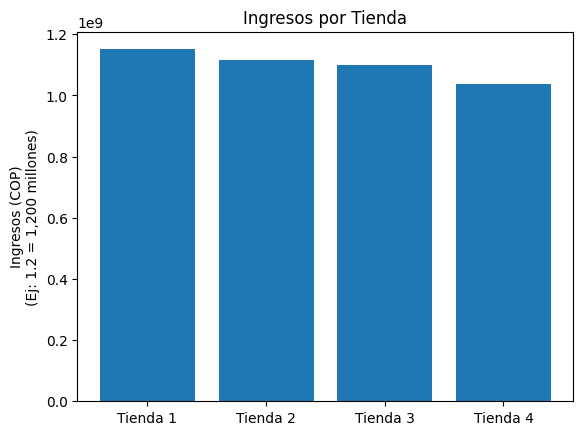

In [36]:
# Datos
tiendas = list(ingresos.keys())
ingresos_cop = list(ingresos.values())

# Gráfico de barras
plt.bar(tiendas, ingresos_cop)
plt.title('Ingresos por Tienda')
plt.ylabel('Ingresos (COP)\n(Ej: 1.2 = 1,200 millones)')
plt.show()

La Tienda 1 registra el mayor ingreso total por ventas seguida por las Tiendas 2, 3 y 4 en ese orden.

# 2. Ventas por categoría

En esta parte, analizamos cuál es la categoría de productos que más ingresos genera en cada tienda. Para lograrlo, agrupamos todos los productos vendidos según su categoría y sumamos los ingresos correspondientes. Luego, identificamos la categoría con mayores ventas en pesos colombianos (COP) y también mostramos su equivalente en dólares estadounidenses (USD), usando la tasa de cambio previamente definida.
Esto nos permite entender qué tipo de productos tienen mejor rendimiento económico en cada tienda.

In [13]:
def mejor_categoria(tienda, nombre):                                     # Define la función y recibe los datos de una tienda
    ingresos = tienda.groupby("Categoría del Producto")["Precio"].sum()  # Suma ingresos por categoría
    mejor = ingresos.idxmax()                                            # Encuentra la categoría con más ingreso
    cop = ingresos[mejor]                                                # Obtiene el valor en COP
    usd = cop / tasa_cambio                                              # Convierte a USD
    print(f"\nMejor categoría en {nombre}:")                             # Imprime la tienda
    print(f"{mejor}: (COP ${cop:,.2f})  (USD ${usd:,.2f})")              # Muestra categoría + valores

# llamar la funciion para cada tienda
mejor_categoria(tienda1, "Tienda 1")
mejor_categoria(tienda2, "Tienda 2")
mejor_categoria(tienda3, "Tienda 3")
mejor_categoria(tienda4, "Tienda 4")


Mejor categoría en Tienda 1:
Electrónicos: (COP $429,493,500.00)  (USD $102,479.96)

Mejor categoría en Tienda 2:
Electrónicos: (COP $410,831,100.00)  (USD $98,026.99)

Mejor categoría en Tienda 3:
Electrónicos: (COP $410,775,800.00)  (USD $98,013.79)

Mejor categoría en Tienda 4:
Electrónicos: (COP $409,476,100.00)  (USD $97,703.67)


En conclusión se observa que la categoria mas vendida en todas las tiendas fue Electrónicos.

# 3. Calificación promedio de la tienda


Para calcular la calificación promedio de cada tienda, extraemos las calificaciones de todos los productos de cada tienda y calculamos su promedio. Este valor refleja la satisfacción general de los clientes con los productos de cada tienda.

In [15]:
# Calcular la calificación promedio de cada tienda
calificacion_promedio = {
    'Tienda 1': tienda1['Calificación'].mean(), # se utiliza .mean(), para calcular el promedio
    'Tienda 2': tienda2['Calificación'].mean(),
    'Tienda 3': tienda3['Calificación'].mean(),
    'Tienda 4': tienda4['Calificación'].mean()
}

# Mostrar los resultados
for tienda, promedio in calificacion_promedio.items():
    print(f"Calificación promedio de {tienda}: {promedio:.2f}")

Calificación promedio de Tienda 1: 3.98
Calificación promedio de Tienda 2: 4.04
Calificación promedio de Tienda 3: 4.05
Calificación promedio de Tienda 4: 4.00


###3.1 Gráfico de barras: Calificación promedio por tienda


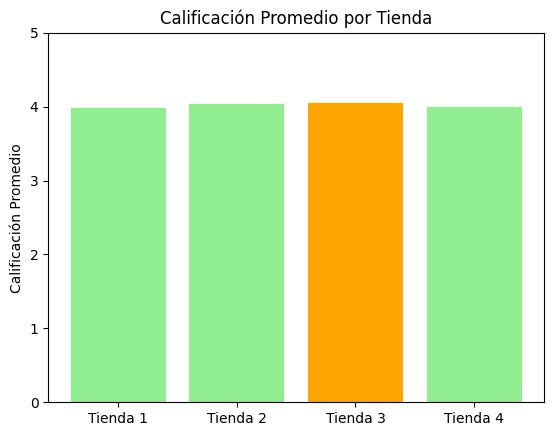

In [17]:
# Crear gráfico de barras
tiendas = list(calificacion_promedio.keys())
calificaciones = list(calificacion_promedio.values())

# Crear lista de colores donde la barra con la calificación más alta será de un color diferente
colores = ['lightgreen' if cal != max(calificaciones) else 'orange' for cal in calificaciones]

# Graficar barras
plt.bar(tiendas, calificaciones, color=colores)
plt.title('Calificación Promedio por Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0, 5)  # Rango de calificación (suponiendo que es de 0 a 5)
plt.show()

Podemos observar y concluir que la Tienda 3 es la que posee mayor promedio de calificación.

# 4. Productos más y menos vendidos

Se identificaron los productos con mayor y menor número de ventas en cada tienda, analizando la frecuencia de aparición de cada producto en los datos.

In [18]:
# Función para obtener el producto más y menos vendido por tienda
def producto_mas_menos_vendido(tienda, nombre):
    conteo = tienda['Producto'].value_counts()
    mas_vendido = conteo.idxmax()
    menos_vendido = conteo.idxmin()
    print(f"\n{name}:")
    print(f"Producto más vendido: {mas_vendido} ({conteo.max()} ventas)")
    print(f"Producto menos vendido: {menos_vendido} ({conteo.min()} venta)")
    return nombre, mas_vendido, conteo.max(), menos_vendido, conteo.min()

# Obtener resultados por tienda
resultados = []
for tienda, name in zip([tienda1, tienda2, tienda3, tienda4], ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]):
    resultados.append(producto_mas_menos_vendido(tienda, name))


Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 venta)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 venta)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 venta)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 venta)


Se observa que la Tienda 2 posee la mayor venta por producto, así como también el producto menos vendido.

# 5. Envío promedio por tienda

En esta sección se calcula el costo promedio de envío de los productos vendidos en cada tienda. Este valor se obtiene tomando el promedio del Costo de envío para cada tienda, y se convierte a dólares estadounidenses (USD) utilizando la tasa de cambio actual. El objetivo es conocer cuánto está pagando, en promedio, cada tienda por el servicio de envío de sus productos.

In [29]:
# Calcular el costo promedio de envío por tienda
envio_promedio = {
    'Tienda 1': tienda1['Costo de envío'].mean(),
    'Tienda 2': tienda2['Costo de envío'].mean(),
    'Tienda 3': tienda3['Costo de envío'].mean(),
    'Tienda 4': tienda4['Costo de envío'].mean()
}

# Mostrar resultados
for tienda, promedio in envio_promedio.items():
  usd = promedio / tasa_cambio  # Convertir a USD
  print(f"Costo promedio de envío en {tienda}: COP ${promedio:,.2f}   (USD ${usd:,.2f})")

Costo promedio de envío en Tienda 1: COP $26,018.61   (USD $6.21)
Costo promedio de envío en Tienda 2: COP $25,216.24   (USD $6.02)
Costo promedio de envío en Tienda 3: COP $24,805.68   (USD $5.92)
Costo promedio de envío en Tienda 4: COP $23,459.46   (USD $5.60)


###5.1 Gráfico de torta para observar cuál tienda tiene mayor costo promedio de envío:

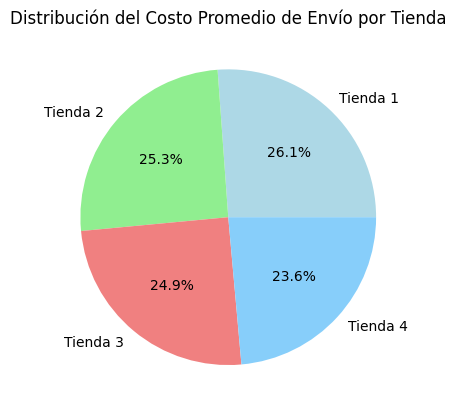

In [30]:
# Datos para gráfico de torta
tiendas = list(envio_promedio.keys())
costos_envio = list(envio_promedio.values())

# Crear gráfico de torta
plt.pie(costos_envio, labels=tiendas, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightcoral', 'lightskyblue'])
plt.title('Distribución del Costo Promedio de Envío por Tienda')
plt.show()

Levemente la tienda numero 1 tiene el mayor costo promedio de envio.

#6 Gráficos de dispersión para analizar la relación entre los ingresos y la satisfacción de los clientes.


Este gráfico de dispersión muestra cómo se relacionan los ingresos de cada tienda (en COP) con la calificación promedio de sus productos. Cada tienda tiene un color y etiqueta única, lo que permite identificar fácilmente su posición en el gráfico. Este análisis ayuda a observar si existe una relación entre los ingresos y la satisfacción de los clientes.






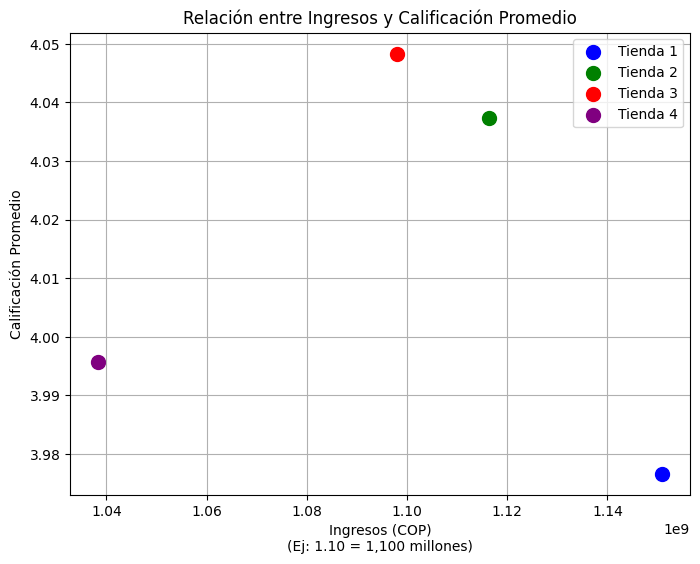

In [34]:
# Datos de ingresos y calificación promedio
tiendas = list(ingresos.keys())  # Tiendas
ingresos_cop = list(ingresos.values())  # Ingresos en COP
calificaciones = list(calificacion_promedio.values())  # Calificación promedio

# Colores distintos para cada tienda
colores = ['blue', 'green', 'red', 'purple']

# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))  # Ajustar tamaño de la figura
for i in range(len(tiendas)):
    plt.scatter(ingresos_cop[i], calificaciones[i], color=colores[i], s=100, label=tiendas[i])

# Añadir etiquetas
plt.title('Relación entre Ingresos y Calificación Promedio')
plt.xlabel('Ingresos (COP)\n(Ej: 1.10 = 1,100 millones)')
plt.ylabel('Calificación Promedio')
plt.grid(True)

# Agregar leyenda para identificar las tiendas
plt.legend()

# Mostrar el gráfico
plt.show()

En este gráfico de dispersión no se observa una relación clara entre los ingresos de las tiendas y su calificación promedio. A pesar de las diferencias en los ingresos y calificaciones, no parece haber una correlación evidente entre ambos factores, lo que sugiere que el desempeño financiero de las tiendas no está necesariamente ligado a la satisfacción de los clientes.

#7 Conclusion para vender 1 de las tiendas

### 📌 Conclusión Final

A partir del análisis de los datos obtenidos, se pueden destacar los siguientes puntos clave por tienda:

#### 💰 **Ingresos totales por tienda (de mayor a menor):**

- **Tienda 1**:  
  - COP $1,150,880,400.00  
  - USD $274,607.59  

- **Tienda 2**:  
  - COP $1,116,343,500.00  
  - USD $266,366.86  

- **Tienda 3**:  
  - COP $1,098,019,600.00  
  - USD $261,994.66  

- **Tienda 4**:  
  - COP $1,038,375,700.00  
  - USD $247,763.23  

#### 🛍️ **Categoría más vendida por tienda (Electrónicos en todos los casos):**

- **Tienda 1**: COP $429,493,500.00 / USD $102,479.96  
- **Tienda 2**: COP $410,831,100.00 / USD $98,026.99  
- **Tienda 3**: COP $410,775,800.00 / USD $98,013.79  
- **Tienda 4**: COP $409,476,100.00 / USD $97,703.67  

#### ⭐ **Calificación promedio por tienda:**

- **Tienda 3**: 4.05  
- **Tienda 2**: 4.04  
- **Tienda 4**: 4.00  
- **Tienda 1**: 3.98  

#### 🚚 **Costo promedio de envío por tienda:**

- **Tienda 1**: COP $26,018.61 / USD $6.21  
- **Tienda 2**: COP $25,216.24 / USD $6.02  
- **Tienda 3**: COP $24,805.68 / USD $5.92  
- **Tienda 4**: COP $23,459.46 / USD $5.60  

---

### 📝 Recomendación

A pesar de que **la Tienda 1** lidera en ingresos y ventas en la categoría de electrónicos, su **calificación promedio es la más baja**, lo que indica posibles problemas en la experiencia del cliente.

**La Tienda 3**, aunque no es la de mayores ingresos, tiene **la mejor calificación promedio** y un buen equilibrio en costos de envío y ventas, lo que la hace una excelente opción para consolidar y seguir invirtiendo.

Por otro lado, **la Tienda 4 muestra el peor desempeño en ingresos** y una calificación promedio moderada. Aunque tiene el costo de envío más bajo, no compensa en términos de rentabilidad global.

> ✅ **Conclusión: se recomienda vender la Tienda 4 y enfocar esfuerzos en mejorar la experiencia del cliente en la Tienda 1, mientras se fortalece la Tienda 3.**





